In [2]:
pip install numpy-stl

Note: you may need to restart the kernel to use updated packages.


Saved C:/Users/bkyou/datadir/stl\spleen.stl
Saved C:/Users/bkyou/datadir/stl\right_kidney.stl
Saved C:/Users/bkyou/datadir/stl\left_kidney.stl
Saved C:/Users/bkyou/datadir/stl\gallbladder.stl
Saved C:/Users/bkyou/datadir/stl\liver.stl
Saved C:/Users/bkyou/datadir/stl\stomach.stl
Saved C:/Users/bkyou/datadir/stl\aorta.stl
Saved C:/Users/bkyou/datadir/stl\inferior_vena_cava.stl
Saved C:/Users/bkyou/datadir/stl\portal_vein_and_splenic_vein.stl
Saved C:/Users/bkyou/datadir/stl\pancreas.stl
Saved C:/Users/bkyou/datadir/stl\right_adrenal_gland.stl
Saved C:/Users/bkyou/datadir/stl\left_adrenal_gland.stl
Saved C:/Users/bkyou/datadir/stl\left_upper_lobe_lung.stl
Saved C:/Users/bkyou/datadir/stl\left_lower_lobe_lung.stl
Saved C:/Users/bkyou/datadir/stl\right_upper_lobe_lung.stl
Saved C:/Users/bkyou/datadir/stl\right_middle_lobe_lung.stl
Saved C:/Users/bkyou/datadir/stl\right_lower_lobe_lung.stl
Saved C:/Users/bkyou/datadir/stl\vertebrae_L5.stl
Saved C:/Users/bkyou/datadir/stl\vertebrae_L4.stl
Sa

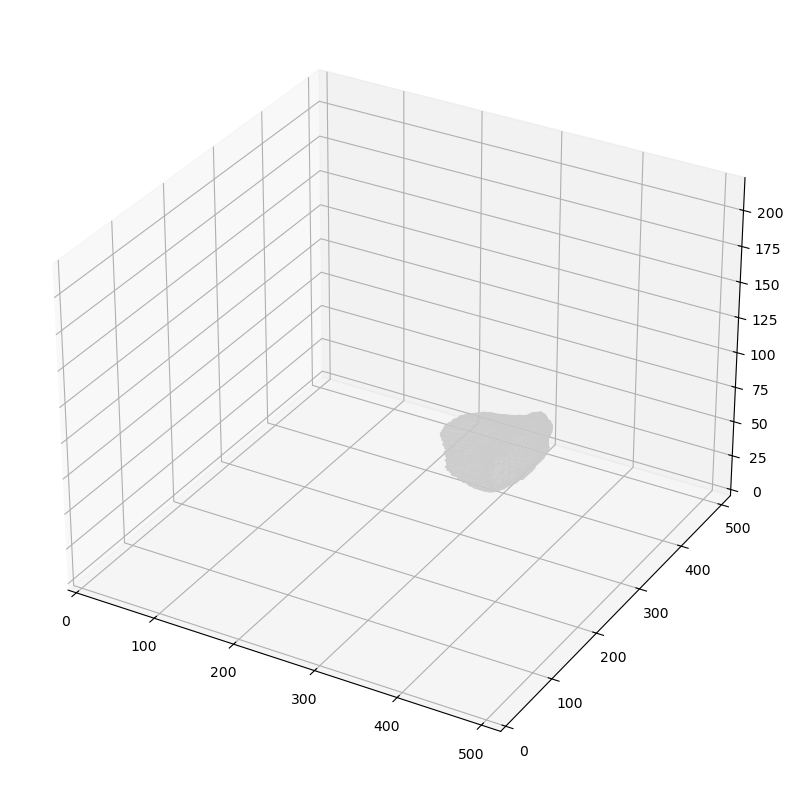

In [5]:
#3D 볼륨화 후 출력한 파일
import numpy as np
import nibabel as nib
import os
from skimage import measure
from stl import mesh
from trimesh.smoothing import filter_laplacian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 장기 라벨과 이름 매핑
label_names = {
    0: 'background',  # 배경
    1: 'spleen',  # 비장
    2: 'right_kidney',  # 오른쪽 신장
    3: 'left_kidney',  # 왼쪽 신장
    4: 'gallbladder',  # 담낭
    5: 'liver',  # 간
    6: 'stomach',  # 위
    7: 'aorta',  # 대동맥
    8: 'inferior_vena_cava',  # 하대정맥
    9: 'portal_vein_and_splenic_vein',  # 문맥 및 비장 정맥
    10: 'pancreas',  # 췌장
    11: 'right_adrenal_gland',  # 오른쪽 부신
    12: 'left_adrenal_gland',  # 왼쪽 부신
    13: 'left_upper_lobe_lung',  # 왼쪽 상엽 폐
    14: 'left_lower_lobe_lung',  # 왼쪽 하엽 폐
    15: 'right_upper_lobe_lung',  # 오른쪽 상엽 폐
    16: 'right_middle_lobe_lung',  # 오른쪽 중엽 폐
    17: 'right_lower_lobe_lung',  # 오른쪽 하엽 폐
    18: 'vertebrae_L5',  # L5 척추
    19: 'vertebrae_L4',  # L4 척추
    20: 'vertebrae_L3',  # L3 척추
    21: 'vertebrae_L2',  # L2 척추
    22: 'vertebrae_L1',  # L1 척추
    23: 'vertebrae_T12',  # T12 척추
    24: 'vertebrae_T11',  # T11 척추
    25: 'vertebrae_T10',  # T10 척추
    26: 'vertebrae_T9',  # T9 척추
    27: 'vertebrae_T8',  # T8 척추
    28: 'vertebrae_T7',  # T7 척추
    29: 'vertebrae_T6',  # T6 척추
    30: 'vertebrae_T5',  # T5 척추
    31: 'vertebrae_T4',  # T4 척추
    32: 'vertebrae_T3',  # T3 척추
    33: 'vertebrae_T2',  # T2 척추
    34: 'vertebrae_T1',  # T1 척추
    35: 'vertebrae_C7',  # C7 척추
    36: 'vertebrae_C6',  # C6 척추
    37: 'vertebrae_C5',  # C5 척추
    38: 'vertebrae_C4',  # C4 척추
    39: 'vertebrae_C3',  # C3 척추
    40: 'vertebrae_C2',  # C2 척추
    41: 'vertebrae_C1',  # C1 척추
    42: 'esophagus',  # 식도
    43: 'trachea',  # 기관
    44: 'heart_myocardium',  # 심근
    45: 'heart_atrium_left',  # 왼쪽 심방
    46: 'heart_ventricle_left',  # 왼쪽 심실
    47: 'heart_atrium_right',  # 오른쪽 심방
    48: 'heart_ventricle_right',  # 오른쪽 심실
    49: 'pulmonary_artery',  # 폐동맥
    50: 'brain',  # 뇌
    51: 'iliac_artery_left',  # 왼쪽 장골 동맥
    52: 'iliac_artery_right',  # 오른쪽 장골 동맥
    53: 'iliac_vena_left',  # 왼쪽 장골 정맥
    54: 'iliac_vena_right',  # 오른쪽 장골 정맥
    55: 'small_bowel',  # 소장
    56: 'duodenum',  # 십이지장
    57: 'colon',  # 대장
    58: 'rib_left_1',  # 왼쪽 1번 갈비뼈
    59: 'rib_left_2',  # 왼쪽 2번 갈비뼈
    60: 'rib_left_3',  # 왼쪽 3번 갈비뼈
    61: 'rib_left_4',  # 왼쪽 4번 갈비뼈
    62: 'rib_left_5',  # 왼쪽 5번 갈비뼈
    63: 'rib_left_6',  # 왼쪽 6번 갈비뼈
    64: 'rib_left_7',  # 왼쪽 7번 갈비뼈
    65: 'rib_left_8',  # 왼쪽 8번 갈비뼈
    66: 'rib_left_9',  # 왼쪽 9번 갈비뼈
    67: 'rib_left_10',  # 왼쪽 10번 갈비뼈
    68: 'rib_left_11',  # 왼쪽 11번 갈비뼈
    69: 'rib_left_12',  # 왼쪽 12번 갈비뼈
    70: 'rib_right_1',  # 오른쪽 1번 갈비뼈
    71: 'rib_right_2',  # 오른쪽 2번 갈비뼈
    72: 'rib_right_3',  # 오른쪽 3번 갈비뼈
    73: 'rib_right_4',  # 오른쪽 4번 갈비뼈
    74: 'rib_right_5',  # 오른쪽 5번 갈비뼈
    75: 'rib_right_6',  # 오른쪽 6번 갈비뼈
    76: 'rib_right_7',  # 오른쪽 7번 갈비뼈
    77: 'rib_right_8',  # 오른쪽 8번 갈비뼈
    78: 'rib_right_9',  # 오른쪽 9번 갈비뼈
    79: 'rib_right_10',  # 오른쪽 10번 갈비뼈
    80: 'rib_right_11',  # 오른쪽 11번 갈비뼈
    81: 'rib_right_12',  # 오른쪽 12번 갈비뼈
    82: 'humerus_left',  # 왼쪽 상완골
    83: 'humerus_right',  # 오른쪽 상완골
    84: 'scapula_left',  # 왼쪽 견갑골
    85: 'scapula_right',  # 오른쪽 견갑골
    86: 'clavicula_left',  # 왼쪽 쇄골
    87: 'clavicula_right',  # 오른쪽 쇄골
    88: 'femur_left',  # 왼쪽 대퇴골
    89: 'femur_right',  # 오른쪽 대퇴골
    90: 'hip_left',  # 왼쪽 고관절
    91: 'hip_right',  # 오른쪽 고관절
    92: 'sacrum',  # 천골
    93: 'face',  # 얼굴
    94: 'gluteus_maximus_left',  # 왼쪽 대둔근
    95: 'gluteus_maximus_right',  # 오른쪽 대둔근
    96: 'gluteus_medius_left',  # 왼쪽 중둔근
    97: 'gluteus_medius_right',  # 오른쪽 중둔근
    98: 'gluteus_minimus_left',  # 왼쪽 소둔근
    99: 'gluteus_minimus_right',  # 오른쪽 소둔근
    100: 'autochthon_left',  # 왼쪽 척주기립근
    101: 'autochthon_right',  # 오른쪽 척주기립근
    102: 'iliopsoas_left',  # 왼쪽 장요근
    103: 'iliopsoas_right',  # 오른쪽 장요근
    104: 'urinary_bladder'  # 방광
}

def nifti_to_stl(nifti_file, output_dir):
    # NIfTI 파일 로드
    img = nib.load(nifti_file)
    img_data = img.get_fdata()

    # 고유 라벨 가져오기
    unique_labels = np.unique(img_data)

    # 출력 디렉토리가 존재하는지 확인하고 없으면 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 각 고유 라벨을 순회하면서 각각의 라벨에 대해 메쉬 생성
    for label in unique_labels:
        if label == 0:
            continue  # 배경은 건너뜀

        # 현재 라벨에 대한 이진 마스크 생성
        binary_mask = img_data == label

        # marching cubes 알고리즘을 사용해 메쉬 생성
        verts, faces, normals, values = measure.marching_cubes(binary_mask, 0.5)

        # 메쉬 객체 생성 및 STL 파일로 저장
        mesh_data = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
        for i, face in enumerate(faces):
            for j in range(3):
                mesh_data.vectors[i][j] = verts[face[j]]

        label_name = label_names.get(label, f'label_{int(label)}')
        output_file = os.path.join(output_dir, f'{label_name}.stl')
        mesh_data.save(output_file)
        print(f'Saved {output_file}')

def plot_3d_model(volume, label):
    verts, faces, _, _ = measure.marching_cubes(volume == label, level=0.5)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.8, 0.8, 0.8]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, volume.shape[0])
    ax.set_ylim(0, volume.shape[1])
    ax.set_zlim(0, volume.shape[2])

    plt.show()

# 사용 예제
nifti_file = 'C:/Users/bkyou/datadir/1.3.6.1.4.1.14519.5.2.1.1600.1201/1.3.6.1.4.1.14519.5.2.1.1600.1201_trans.nii.gz'
output_dir = 'C:/Users/bkyou/datadir/stl'

# NIfTI 파일을 STL 파일로 변환
nifti_to_stl(nifti_file, output_dir)

# NIfTI 파일 로드 및 3D 볼륨화
img = nib.load(nifti_file)
img_data = img.get_fdata()

# 특정 라벨에 대해 3D 모델 시각화
plot_3d_model(img_data, label=1)  # 여기서 label=1은 비장(spleen)을 예시로 들었습니다.


In [5]:
# 부피 조정하지 않은 스무딩한 파일

import nibabel as nib
import numpy as np
import trimesh
from skimage import measure
import os
from trimesh.smoothing import filter_laplacian, filter_humphrey

# 장기 라벨과 이름 매핑
label_names = {
    0: 'background',  # 배경
    1: 'spleen',  # 비장
    2: 'right_kidney',  # 오른쪽 신장
    3: 'left_kidney',  # 왼쪽 신장
    4: 'gallbladder',  # 담낭
    5: 'liver',  # 간
    6: 'stomach',  # 위
    7: 'aorta',  # 대동맥
    8: 'inferior_vena_cava',  # 하대정맥
    9: 'portal_vein_and_splenic_vein',  # 문맥 및 비장 정맥
    10: 'pancreas',  # 췌장
    11: 'right_adrenal_gland',  # 오른쪽 부신
    12: 'left_adrenal_gland',  # 왼쪽 부신
    13: 'left_upper_lobe_lung',  # 왼쪽 상엽 폐
    14: 'left_lower_lobe_lung',  # 왼쪽 하엽 폐
    15: 'right_upper_lobe_lung',  # 오른쪽 상엽 폐
    16: 'right_middle_lobe_lung',  # 오른쪽 중엽 폐
    17: 'right_lower_lobe_lung',  # 오른쪽 하엽 폐
    18: 'vertebrae_L5',  # L5 척추
    19: 'vertebrae_L4',  # L4 척추
    20: 'vertebrae_L3',  # L3 척추
    21: 'vertebrae_L2',  # L2 척추
    22: 'vertebrae_L1',  # L1 척추
    23: 'vertebrae_T12',  # T12 척추
    24: 'vertebrae_T11',  # T11 척추
    25: 'vertebrae_T10',  # T10 척추
    26: 'vertebrae_T9',  # T9 척추
    27: 'vertebrae_T8',  # T8 척추
    28: 'vertebrae_T7',  # T7 척추
    29: 'vertebrae_T6',  # T6 척추
    30: 'vertebrae_T5',  # T5 척추
    31: 'vertebrae_T4',  # T4 척추
    32: 'vertebrae_T3',  # T3 척추
    33: 'vertebrae_T2',  # T2 척추
    34: 'vertebrae_T1',  # T1 척추
    35: 'vertebrae_C7',  # C7 척추
    36: 'vertebrae_C6',  # C6 척추
    37: 'vertebrae_C5',  # C5 척추
    38: 'vertebrae_C4',  # C4 척추
    39: 'vertebrae_C3',  # C3 척추
    40: 'vertebrae_C2',  # C2 척추
    41: 'vertebrae_C1',  # C1 척추
    42: 'esophagus',  # 식도
    43: 'trachea',  # 기관
    44: 'heart_myocardium',  # 심근
    45: 'heart_atrium_left',  # 왼쪽 심방
    46: 'heart_ventricle_left',  # 왼쪽 심실
    47: 'heart_atrium_right',  # 오른쪽 심방
    48: 'heart_ventricle_right',  # 오른쪽 심실
    49: 'pulmonary_artery',  # 폐동맥
    50: 'brain',  # 뇌
    51: 'iliac_artery_left',  # 왼쪽 장골 동맥
    52: 'iliac_artery_right',  # 오른쪽 장골 동맥
    53: 'iliac_vena_left',  # 왼쪽 장골 정맥
    54: 'iliac_vena_right',  # 오른쪽 장골 정맥
    55: 'small_bowel',  # 소장
    56: 'duodenum',  # 십이지장
    57: 'colon',  # 대장
    58: 'rib_left_1',  # 왼쪽 1번 갈비뼈
    59: 'rib_left_2',  # 왼쪽 2번 갈비뼈
    60: 'rib_left_3',  # 왼쪽 3번 갈비뼈
    61: 'rib_left_4',  # 왼쪽 4번 갈비뼈
    62: 'rib_left_5',  # 왼쪽 5번 갈비뼈
    63: 'rib_left_6',  # 왼쪽 6번 갈비뼈
    64: 'rib_left_7',  # 왼쪽 7번 갈비뼈
    65: 'rib_left_8',  # 왼쪽 8번 갈비뼈
    66: 'rib_left_9',  # 왼쪽 9번 갈비뼈
    67: 'rib_left_10',  # 왼쪽 10번 갈비뼈
    68: 'rib_left_11',  # 왼쪽 11번 갈비뼈
    69: 'rib_left_12',  # 왼쪽 12번 갈비뼈
    70: 'rib_right_1',  # 오른쪽 1번 갈비뼈
    71: 'rib_right_2',  # 오른쪽 2번 갈비뼈
    72: 'rib_right_3',  # 오른쪽 3번 갈비뼈
    73: 'rib_right_4',  # 오른쪽 4번 갈비뼈
    74: 'rib_right_5',  # 오른쪽 5번 갈비뼈
    75: 'rib_right_6',  # 오른쪽 6번 갈비뼈
    76: 'rib_right_7',  # 오른쪽 7번 갈비뼈
    77: 'rib_right_8',  # 오른쪽 8번 갈비뼈
    78: 'rib_right_9',  # 오른쪽 9번 갈비뼈
    79: 'rib_right_10',  # 오른쪽 10번 갈비뼈
    80: 'rib_right_11',  # 오른쪽 11번 갈비뼈
    81: 'rib_right_12',  # 오른쪽 12번 갈비뼈
    82: 'humerus_left',  # 왼쪽 상완골
    83: 'humerus_right',  # 오른쪽 상완골
    84: 'scapula_left',  # 왼쪽 견갑골
    85: 'scapula_right',  # 오른쪽 견갑골
    86: 'clavicula_left',  # 왼쪽 쇄골
    87: 'clavicula_right',  # 오른쪽 쇄골
    88: 'femur_left',  # 왼쪽 대퇴골
    89: 'femur_right',  # 오른쪽 대퇴골
    90: 'hip_left',  # 왼쪽 고관절
    91: 'hip_right',  # 오른쪽 고관절
    92: 'sacrum',  # 천골
    93: 'face',  # 얼굴
    94: 'gluteus_maximus_left',  # 왼쪽 대둔근
    95: 'gluteus_maximus_right',  # 오른쪽 대둔근
    96: 'gluteus_medius_left',  # 왼쪽 중둔근
    97: 'gluteus_medius_right',  # 오른쪽 중둔근
    98: 'gluteus_minimus_left',  # 왼쪽 소둔근
    99: 'gluteus_minimus_right',  # 오른쪽 소둔근
    100: 'autochthon_left',  # 왼쪽 척주기립근
    101: 'autochthon_right',  # 오른쪽 척주기립근
    102: 'iliopsoas_left',  # 왼쪽 장요근
    103: 'iliopsoas_right',  # 오른쪽 장요근
    104: 'urinary_bladder'  # 방광
}

def nifti_to_stl(nifti_file, output_dir):
    # Check if the file exists
    if not os.path.exists(nifti_file):
        print(f"File does not exist: {nifti_file}")
        return

    try:
        # Load the NIfTI file
        img = nib.load(nifti_file)
    except Exception as e:
        print(f"Error loading NIfTI file: {e}")
        return
    
    img_data = img.get_fdata()

    # Get unique labels
    unique_labels = np.unique(img_data)

    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through each unique label and create a mesh for each label
    for label in unique_labels:
        if label == 0:
            continue  # Skip the background

        # Create a binary mask for the current label
        binary_mask = img_data == label

        # Use marching cubes to create a mesh with higher resolution
        verts, faces, normals, values = measure.marching_cubes(binary_mask, level=0.5, step_size=1)

        # Create a mesh object
        mesh = trimesh.Trimesh(vertices=verts, faces=faces)

        # Smooth the mesh using Laplacian smoothing
        mesh = filter_laplacian(mesh, lamb=0.5, iterations=100)  # Increased iterations for smoother mesh

        # Alternatively, use Humphrey smoothing for additional smoothing
        mesh = filter_humphrey(mesh, alpha=0.1, beta=0.1, iterations=30)

        label_name = label_names.get(label, f'label_{int(label)}')
        output_file = os.path.join(output_dir, f'{label_name}.stl')
        mesh.export(output_file)
        print(f'Saved {output_file}')

# Example usage
nifti_file = 'C:/Users/bkyou/datadir/1.3.6.1.4.1.14519.5.2.1.1600.1201/1.3.6.1.4.1.14519.5.2.1.1600.1201_trans.nii.gz'
output_stl_path = 'C:/Users/bkyou/datadir/model.stl'
nifti_to_stl(nifti_file, output_dir)


Saved C:/Users/bkyou/datadir/model.stl\spleen.stl
Saved C:/Users/bkyou/datadir/model.stl\right_kidney.stl
Saved C:/Users/bkyou/datadir/model.stl\left_kidney.stl
Saved C:/Users/bkyou/datadir/model.stl\gallbladder.stl
Saved C:/Users/bkyou/datadir/model.stl\liver.stl
Saved C:/Users/bkyou/datadir/model.stl\stomach.stl
Saved C:/Users/bkyou/datadir/model.stl\aorta.stl
Saved C:/Users/bkyou/datadir/model.stl\inferior_vena_cava.stl
Saved C:/Users/bkyou/datadir/model.stl\portal_vein_and_splenic_vein.stl
Saved C:/Users/bkyou/datadir/model.stl\pancreas.stl
Saved C:/Users/bkyou/datadir/model.stl\right_adrenal_gland.stl
Saved C:/Users/bkyou/datadir/model.stl\left_adrenal_gland.stl
Saved C:/Users/bkyou/datadir/model.stl\left_upper_lobe_lung.stl
Saved C:/Users/bkyou/datadir/model.stl\left_lower_lobe_lung.stl
Saved C:/Users/bkyou/datadir/model.stl\right_upper_lobe_lung.stl
Saved C:/Users/bkyou/datadir/model.stl\right_middle_lobe_lung.stl
Saved C:/Users/bkyou/datadir/model.stl\right_lower_lobe_lung.stl


C:\Users\bkyou\anaconda3\Lib\site-packages\trimesh\smoothing.py:86: RuntimeWarning: invalid value encountered in scalar power
  vertices *= (vol_ini / vol_new) ** (1.0 / 3.0)


Saved C:/Users/bkyou/datadir/model.stl\vertebrae_C7.stl
Saved C:/Users/bkyou/datadir/model.stl\vertebrae_C6.stl
Saved C:/Users/bkyou/datadir/model.stl\vertebrae_C3.stl
Saved C:/Users/bkyou/datadir/model.stl\vertebrae_C2.stl
Saved C:/Users/bkyou/datadir/model.stl\esophagus.stl
Saved C:/Users/bkyou/datadir/model.stl\trachea.stl
Saved C:/Users/bkyou/datadir/model.stl\heart_myocardium.stl
Saved C:/Users/bkyou/datadir/model.stl\heart_atrium_left.stl
Saved C:/Users/bkyou/datadir/model.stl\heart_ventricle_left.stl
Saved C:/Users/bkyou/datadir/model.stl\heart_atrium_right.stl
Saved C:/Users/bkyou/datadir/model.stl\heart_ventricle_right.stl
Saved C:/Users/bkyou/datadir/model.stl\pulmonary_artery.stl
Saved C:/Users/bkyou/datadir/model.stl\iliac_artery_left.stl
Saved C:/Users/bkyou/datadir/model.stl\iliac_artery_right.stl
Saved C:/Users/bkyou/datadir/model.stl\iliac_vena_left.stl
Saved C:/Users/bkyou/datadir/model.stl\iliac_vena_right.stl
Saved C:/Users/bkyou/datadir/model.stl\small_bowel.stl
Sav

In [6]:
# 부피 조정한 파일

import nibabel as nib  # NIfTI 파일을 읽고 쓰기 위한 라이브러리
import numpy as np  # 다양한 수학적 연산과 배열 관리를 위한 라이브러리
import trimesh  # 3D 메쉬를 생성, 수정, 시각화 및 저장하는 데 사용되는 라이브러리
from skimage import measure  # 영상 처리를 위한 함수들을 제공하는 라이브러리, 여기서는 메쉬 생성에 사용
import os  # 운영체제와 상호 작용하기 위한 라이브러리
from trimesh.smoothing import filter_laplacian, filter_humphrey  # 메쉬 평활화에 사용되는 함수

# 장기 라벨과 이름 매핑
label_names = {
        0: 'background',  # 배경
    1: 'spleen',  # 비장
    2: 'right_kidney',  # 오른쪽 신장
    3: 'left_kidney',  # 왼쪽 신장
    4: 'gallbladder',  # 담낭
    5: 'liver',  # 간
    6: 'stomach',  # 위
    7: 'aorta',  # 대동맥
    8: 'inferior_vena_cava',  # 하대정맥
    9: 'portal_vein_and_splenic_vein',  # 문맥 및 비장 정맥
    10: 'pancreas',  # 췌장
    11: 'right_adrenal_gland',  # 오른쪽 부신
    12: 'left_adrenal_gland',  # 왼쪽 부신
    13: 'left_upper_lobe_lung',  # 왼쪽 상엽 폐
    14: 'left_lower_lobe_lung',  # 왼쪽 하엽 폐
    15: 'right_upper_lobe_lung',  # 오른쪽 상엽 폐
    16: 'right_middle_lobe_lung',  # 오른쪽 중엽 폐
    17: 'right_lower_lobe_lung',  # 오른쪽 하엽 폐
    18: 'vertebrae_L5',  # L5 척추
    19: 'vertebrae_L4',  # L4 척추
    20: 'vertebrae_L3',  # L3 척추
    21: 'vertebrae_L2',  # L2 척추
    22: 'vertebrae_L1',  # L1 척추
    23: 'vertebrae_T12',  # T12 척추
    24: 'vertebrae_T11',  # T11 척추
    25: 'vertebrae_T10',  # T10 척추
    26: 'vertebrae_T9',  # T9 척추
    27: 'vertebrae_T8',  # T8 척추
    28: 'vertebrae_T7',  # T7 척추
    29: 'vertebrae_T6',  # T6 척추
    30: 'vertebrae_T5',  # T5 척추
    31: 'vertebrae_T4',  # T4 척추
    32: 'vertebrae_T3',  # T3 척추
    33: 'vertebrae_T2',  # T2 척추
    34: 'vertebrae_T1',  # T1 척추
    35: 'vertebrae_C7',  # C7 척추
    36: 'vertebrae_C6',  # C6 척추
    37: 'vertebrae_C5',  # C5 척추
    38: 'vertebrae_C4',  # C4 척추
    39: 'vertebrae_C3',  # C3 척추
    40: 'vertebrae_C2',  # C2 척추
    41: 'vertebrae_C1',  # C1 척추
    42: 'esophagus',  # 식도
    43: 'trachea',  # 기관
    44: 'heart_myocardium',  # 심근
    45: 'heart_atrium_left',  # 왼쪽 심방
    46: 'heart_ventricle_left',  # 왼쪽 심실
    47: 'heart_atrium_right',  # 오른쪽 심방
    48: 'heart_ventricle_right',  # 오른쪽 심실
    49: 'pulmonary_artery',  # 폐동맥
    50: 'brain',  # 뇌
    51: 'iliac_artery_left',  # 왼쪽 장골 동맥
    52: 'iliac_artery_right',  # 오른쪽 장골 동맥
    53: 'iliac_vena_left',  # 왼쪽 장골 정맥
    54: 'iliac_vena_right',  # 오른쪽 장골 정맥
    55: 'small_bowel',  # 소장
    56: 'duodenum',  # 십이지장
    57: 'colon',  # 대장
    58: 'rib_left_1',  # 왼쪽 1번 갈비뼈
    59: 'rib_left_2',  # 왼쪽 2번 갈비뼈
    60: 'rib_left_3',  # 왼쪽 3번 갈비뼈
    61: 'rib_left_4',  # 왼쪽 4번 갈비뼈
    62: 'rib_left_5',  # 왼쪽 5번 갈비뼈
    63: 'rib_left_6',  # 왼쪽 6번 갈비뼈
    64: 'rib_left_7',  # 왼쪽 7번 갈비뼈
    65: 'rib_left_8',  # 왼쪽 8번 갈비뼈
    66: 'rib_left_9',  # 왼쪽 9번 갈비뼈
    67: 'rib_left_10',  # 왼쪽 10번 갈비뼈
    68: 'rib_left_11',  # 왼쪽 11번 갈비뼈
    69: 'rib_left_12',  # 왼쪽 12번 갈비뼈
    70: 'rib_right_1',  # 오른쪽 1번 갈비뼈
    71: 'rib_right_2',  # 오른쪽 2번 갈비뼈
    72: 'rib_right_3',  # 오른쪽 3번 갈비뼈
    73: 'rib_right_4',  # 오른쪽 4번 갈비뼈
    74: 'rib_right_5',  # 오른쪽 5번 갈비뼈
    75: 'rib_right_6',  # 오른쪽 6번 갈비뼈
    76: 'rib_right_7',  # 오른쪽 7번 갈비뼈
    77: 'rib_right_8',  # 오른쪽 8번 갈비뼈
    78: 'rib_right_9',  # 오른쪽 9번 갈비뼈
    79: 'rib_right_10',  # 오른쪽 10번 갈비뼈
    80: 'rib_right_11',  # 오른쪽 11번 갈비뼈
    81: 'rib_right_12',  # 오른쪽 12번 갈비뼈
    82: 'humerus_left',  # 왼쪽 상완골
    83: 'humerus_right',  # 오른쪽 상완골
    84: 'scapula_left',  # 왼쪽 견갑골
    85: 'scapula_right',  # 오른쪽 견갑골
    86: 'clavicula_left',  # 왼쪽 쇄골
    87: 'clavicula_right',  # 오른쪽 쇄골
    88: 'femur_left',  # 왼쪽 대퇴골
    89: 'femur_right',  # 오른쪽 대퇴골
    90: 'hip_left',  # 왼쪽 고관절
    91: 'hip_right',  # 오른쪽 고관절
    92: 'sacrum',  # 천골
    93: 'face',  # 얼굴
    94: 'gluteus_maximus_left',  # 왼쪽 대둔근
    95: 'gluteus_maximus_right',  # 오른쪽 대둔근
    96: 'gluteus_medius_left',  # 왼쪽 중둔근
    97: 'gluteus_medius_right',  # 오른쪽 중둔근
    98: 'gluteus_minimus_left',  # 왼쪽 소둔근
    99: 'gluteus_minimus_right',  # 오른쪽 소둔근
    100: 'autochthon_left',  # 왼쪽 척주기립근
    101: 'autochthon_right',  # 오른쪽 척주기립근
    102: 'iliopsoas_left',  # 왼쪽 장요근
    103: 'iliopsoas_right',  # 오른쪽 장요근
    104: 'urinary_bladder'  # 방광
}

def nifti_to_stl(nifti_file, output_dir):
    # 파일 존재 여부 확인
    if not os.path.exists(nifti_file):
        print(f"파일이 존재하지 않습니다: {nifti_file}")
        return

    try:
        # NIfTI 파일 로드
        img = nib.load(nifti_file)
    except Exception as e:
        print(f"NIfTI 파일 로딩 오류: {e}")
        return
    
    img_data = img.get_fdata()  # 이미지 데이터를 numpy 배열로 가져옴

    # 고유 라벨 추출
    unique_labels = np.unique(img_data)

    # 출력 디렉토리가 존재하지 않을 경우 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 각 고유 라벨에 대해 메쉬 생성
    for label in unique_labels:
        if label == 0:
            continue  # 배경은 건너뛰기

        # 현재 라벨의 이진 마스크 생성
        binary_mask = img_data == label

        # 마칭 큐브 알고리즘을 사용해 메쉬 생성
        verts, faces, normals, values = measure.marching_cubes(binary_mask, level=0.5, step_size=1)

        # 메쉬 객체 생성
        mesh = trimesh.Trimesh(vertices=verts, faces=faces)

        # 초기 부피 계산
        vol_ini = mesh.volume
        
        # 라플라시안 평활화 적용
        mesh = filter_laplacian(mesh, lamb=0.5, iterations=100)

        # 새 부피 계산 후 유효성 검사
        vol_new = mesh.volume
        if vol_new > 0 and vol_ini > 0:
            # 볼륨을 원래대로 조정하여 수축 방지
            scale_factor = (vol_ini / vol_new) ** (1.0 / 3.0)
            mesh.vertices *= scale_factor

        # 험프리 평활화 추가 적용
        mesh = filter_humphrey(mesh, alpha=0.1, beta=0.1, iterations=30)

        # 라벨 이름 검색 및 출력 파일 경로 설정
        label_name = label_names.get(label, f'label_{int(label)}')
        output_file = os.path.join(output_dir, f'{label_name}.stl')
        mesh.export(output_file)  # STL 파일로 내보내기
        print(f'저장된 파일: {output_file}')

# 예제 사용
nifti_file = 'C:/Users/bkyou/datadir/1.3.6.1.4.1.14519.5.2.1.1600.1201/1.3.6.1.4.1.14519.5.2.1.1600.1201_trans.nii.gz'
output_dir = 'C:/Users/bkyou/datadir/models'
nifti_to_stl(nifti_file, output_dir)


저장된 파일: C:/Users/bkyou/datadir/models\spleen.stl
저장된 파일: C:/Users/bkyou/datadir/models\right_kidney.stl
저장된 파일: C:/Users/bkyou/datadir/models\left_kidney.stl
저장된 파일: C:/Users/bkyou/datadir/models\gallbladder.stl
저장된 파일: C:/Users/bkyou/datadir/models\liver.stl
저장된 파일: C:/Users/bkyou/datadir/models\stomach.stl
저장된 파일: C:/Users/bkyou/datadir/models\aorta.stl
저장된 파일: C:/Users/bkyou/datadir/models\inferior_vena_cava.stl
저장된 파일: C:/Users/bkyou/datadir/models\portal_vein_and_splenic_vein.stl
저장된 파일: C:/Users/bkyou/datadir/models\pancreas.stl
저장된 파일: C:/Users/bkyou/datadir/models\right_adrenal_gland.stl
저장된 파일: C:/Users/bkyou/datadir/models\left_adrenal_gland.stl
저장된 파일: C:/Users/bkyou/datadir/models\left_upper_lobe_lung.stl
저장된 파일: C:/Users/bkyou/datadir/models\left_lower_lobe_lung.stl
저장된 파일: C:/Users/bkyou/datadir/models\right_upper_lobe_lung.stl
저장된 파일: C:/Users/bkyou/datadir/models\right_middle_lobe_lung.stl
저장된 파일: C:/Users/bkyou/datadir/models\right_lower_lobe_lung.stl
저장된 파일: C:/Users/

In [8]:
#OBJ 형식으로 출력한 파일

import nibabel as nib  # NIfTI 파일을 읽고 쓰기 위한 라이브러리
import numpy as np  # 다양한 수학적 연산과 배열 관리를 위한 라이브러리
import trimesh  # 3D 메쉬를 생성, 수정, 시각화 및 저장하는 데 사용되는 라이브러리
from skimage import measure  # 영상 처리를 위한 함수들을 제공하는 라이브러리, 여기서는 메쉬 생성에 사용
import os  # 운영체제와 상호 작용하기 위한 라이브러리
from trimesh.smoothing import filter_laplacian, filter_humphrey  # 메쉬 평활화에 사용되는 함수

# 장기 라벨과 이름 매핑
label_names = {
            0: 'background',  # 배경
    1: 'spleen',  # 비장
    2: 'right_kidney',  # 오른쪽 신장
    3: 'left_kidney',  # 왼쪽 신장
    4: 'gallbladder',  # 담낭
    5: 'liver',  # 간
    6: 'stomach',  # 위
    7: 'aorta',  # 대동맥
    8: 'inferior_vena_cava',  # 하대정맥
    9: 'portal_vein_and_splenic_vein',  # 문맥 및 비장 정맥
    10: 'pancreas',  # 췌장
    11: 'right_adrenal_gland',  # 오른쪽 부신
    12: 'left_adrenal_gland',  # 왼쪽 부신
    13: 'left_upper_lobe_lung',  # 왼쪽 상엽 폐
    14: 'left_lower_lobe_lung',  # 왼쪽 하엽 폐
    15: 'right_upper_lobe_lung',  # 오른쪽 상엽 폐
    16: 'right_middle_lobe_lung',  # 오른쪽 중엽 폐
    17: 'right_lower_lobe_lung',  # 오른쪽 하엽 폐
    18: 'vertebrae_L5',  # L5 척추
    19: 'vertebrae_L4',  # L4 척추
    20: 'vertebrae_L3',  # L3 척추
    21: 'vertebrae_L2',  # L2 척추
    22: 'vertebrae_L1',  # L1 척추
    23: 'vertebrae_T12',  # T12 척추
    24: 'vertebrae_T11',  # T11 척추
    25: 'vertebrae_T10',  # T10 척추
    26: 'vertebrae_T9',  # T9 척추
    27: 'vertebrae_T8',  # T8 척추
    28: 'vertebrae_T7',  # T7 척추
    29: 'vertebrae_T6',  # T6 척추
    30: 'vertebrae_T5',  # T5 척추
    31: 'vertebrae_T4',  # T4 척추
    32: 'vertebrae_T3',  # T3 척추
    33: 'vertebrae_T2',  # T2 척추
    34: 'vertebrae_T1',  # T1 척추
    35: 'vertebrae_C7',  # C7 척추
    36: 'vertebrae_C6',  # C6 척추
    37: 'vertebrae_C5',  # C5 척추
    38: 'vertebrae_C4',  # C4 척추
    39: 'vertebrae_C3',  # C3 척추
    40: 'vertebrae_C2',  # C2 척추
    41: 'vertebrae_C1',  # C1 척추
    42: 'esophagus',  # 식도
    43: 'trachea',  # 기관
    44: 'heart_myocardium',  # 심근
    45: 'heart_atrium_left',  # 왼쪽 심방
    46: 'heart_ventricle_left',  # 왼쪽 심실
    47: 'heart_atrium_right',  # 오른쪽 심방
    48: 'heart_ventricle_right',  # 오른쪽 심실
    49: 'pulmonary_artery',  # 폐동맥
    50: 'brain',  # 뇌
    51: 'iliac_artery_left',  # 왼쪽 장골 동맥
    52: 'iliac_artery_right',  # 오른쪽 장골 동맥
    53: 'iliac_vena_left',  # 왼쪽 장골 정맥
    54: 'iliac_vena_right',  # 오른쪽 장골 정맥
    55: 'small_bowel',  # 소장
    56: 'duodenum',  # 십이지장
    57: 'colon',  # 대장
    58: 'rib_left_1',  # 왼쪽 1번 갈비뼈
    59: 'rib_left_2',  # 왼쪽 2번 갈비뼈
    60: 'rib_left_3',  # 왼쪽 3번 갈비뼈
    61: 'rib_left_4',  # 왼쪽 4번 갈비뼈
    62: 'rib_left_5',  # 왼쪽 5번 갈비뼈
    63: 'rib_left_6',  # 왼쪽 6번 갈비뼈
    64: 'rib_left_7',  # 왼쪽 7번 갈비뼈
    65: 'rib_left_8',  # 왼쪽 8번 갈비뼈
    66: 'rib_left_9',  # 왼쪽 9번 갈비뼈
    67: 'rib_left_10',  # 왼쪽 10번 갈비뼈
    68: 'rib_left_11',  # 왼쪽 11번 갈비뼈
    69: 'rib_left_12',  # 왼쪽 12번 갈비뼈
    70: 'rib_right_1',  # 오른쪽 1번 갈비뼈
    71: 'rib_right_2',  # 오른쪽 2번 갈비뼈
    72: 'rib_right_3',  # 오른쪽 3번 갈비뼈
    73: 'rib_right_4',  # 오른쪽 4번 갈비뼈
    74: 'rib_right_5',  # 오른쪽 5번 갈비뼈
    75: 'rib_right_6',  # 오른쪽 6번 갈비뼈
    76: 'rib_right_7',  # 오른쪽 7번 갈비뼈
    77: 'rib_right_8',  # 오른쪽 8번 갈비뼈
    78: 'rib_right_9',  # 오른쪽 9번 갈비뼈
    79: 'rib_right_10',  # 오른쪽 10번 갈비뼈
    80: 'rib_right_11',  # 오른쪽 11번 갈비뼈
    81: 'rib_right_12',  # 오른쪽 12번 갈비뼈
    82: 'humerus_left',  # 왼쪽 상완골
    83: 'humerus_right',  # 오른쪽 상완골
    84: 'scapula_left',  # 왼쪽 견갑골
    85: 'scapula_right',  # 오른쪽 견갑골
    86: 'clavicula_left',  # 왼쪽 쇄골
    87: 'clavicula_right',  # 오른쪽 쇄골
    88: 'femur_left',  # 왼쪽 대퇴골
    89: 'femur_right',  # 오른쪽 대퇴골
    90: 'hip_left',  # 왼쪽 고관절
    91: 'hip_right',  # 오른쪽 고관절
    92: 'sacrum',  # 천골
    93: 'face',  # 얼굴
    94: 'gluteus_maximus_left',  # 왼쪽 대둔근
    95: 'gluteus_maximus_right',  # 오른쪽 대둔근
    96: 'gluteus_medius_left',  # 왼쪽 중둔근
    97: 'gluteus_medius_right',  # 오른쪽 중둔근
    98: 'gluteus_minimus_left',  # 왼쪽 소둔근
    99: 'gluteus_minimus_right',  # 오른쪽 소둔근
    100: 'autochthon_left',  # 왼쪽 척주기립근
    101: 'autochthon_right',  # 오른쪽 척주기립근
    102: 'iliopsoas_left',  # 왼쪽 장요근
    103: 'iliopsoas_right',  # 오른쪽 장요근
    104: 'urinary_bladder'  # 방광
}

def nifti_to_obj(nifti_file, output_dir):
    # 파일 존재 여부 확인
    if not os.path.exists(nifti_file):
        print(f"파일이 존재하지 않습니다: {nifti_file}")
        return

    try:
        # NIfTI 파일 로드
        img = nib.load(nifti_file)
    except Exception as e:
        print(f"NIfTI 파일 로딩 오류: {e}")
        return
    
    img_data = img.get_fdata()  # 이미지 데이터를 numpy 배열로 가져옴

    # 고유 라벨 추출
    unique_labels = np.unique(img_data)

    # 출력 디렉토리가 존재하지 않을 경우 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 각 고유 라벨에 대해 메쉬 생성
    for label in unique_labels:
        if label == 0:
            continue  # 배경은 건너뛰기

        # 현재 라벨의 이진 마스크 생성
        binary_mask = img_data == label

        # 마칭 큐브 알고리즘을 사용해 메쉬 생성
        verts, faces, normals, values = measure.marching_cubes(binary_mask, level=0.5, step_size=1)

        # 메쉬 객체 생성
        mesh = trimesh.Trimesh(vertices=verts, faces=faces)

        # 라플라시안 평활화 적용
        mesh = filter_laplacian(mesh, lamb=0.5, iterations=100)

        # 험프리 평활화 추가 적용
        mesh = filter_humphrey(mesh, alpha=0.1, beta=0.1, iterations=30)

        # 라벨 이름 검색 및 출력 파일 경로 설정
        label_name = label_names.get(label, f'label_{int(label)}')
        output_file = os.path.join(output_dir, f'{label_name}.obj')  # 확장자를 .stl에서 .obj로 변경
        mesh.export(output_file, file_type='obj')  # OBJ 파일로 내보내기
        print(f'저장된 파일: {output_file}')

# 예제 사용
nifti_file = 'C:/Users/bkyou/datadir/1.3.6.1.4.1.14519.5.2.1.1600.1201/1.3.6.1.4.1.14519.5.2.1.1600.1201_trans.nii.gz'
output_dir = 'C:/Users/bkyou/datadir/obj_models'
nifti_to_obj(nifti_file, output_dir)


저장된 파일: C:/Users/bkyou/datadir/obj_models\spleen.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\right_kidney.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\left_kidney.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\gallbladder.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\liver.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\stomach.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\aorta.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\inferior_vena_cava.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\portal_vein_and_splenic_vein.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\pancreas.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\right_adrenal_gland.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\left_adrenal_gland.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\left_upper_lobe_lung.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\left_lower_lobe_lung.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\right_upper_lobe_lung.obj
저장된 파일: C:/Users/bkyou/datadir/obj_models\right_middle_lobe_lung.obj
저장된 파일: C:/Users/